In [1]:
import pandas as pd
import numpy as np


#Read in CSV file and seperate into columns
df_math = pd.read_csv('student-mat.csv', sep=';')

#Allows all columns to be displayed
pd.set_option('display.max_columns', None)

#Checks if there are any missing values
print(df_math.isna().any())


school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool


In [2]:
#Perform One Hot Encoding on nominal variables
categorical_variables = ['Mjob','Fjob','reason','guardian']
df_math_ohe = pd.get_dummies(df_math, columns = categorical_variables)

#Encoding the binary columns 
binary_cols = ['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

df_math_ones = pd.get_dummies(df_math_ohe[binary_cols], drop_first = True)

df_math_pre = df_math_ohe.drop(binary_cols, axis = 1).join(df_math_ones)

df_math_pre.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,True,True,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,True,False,True,True,False,False


In [3]:
df_gp = df_math[df_math['school'] == 'GP']
df_ms = df_math[df_math['school'] == 'MS']

# Exploratory Data Analysis

In [4]:
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


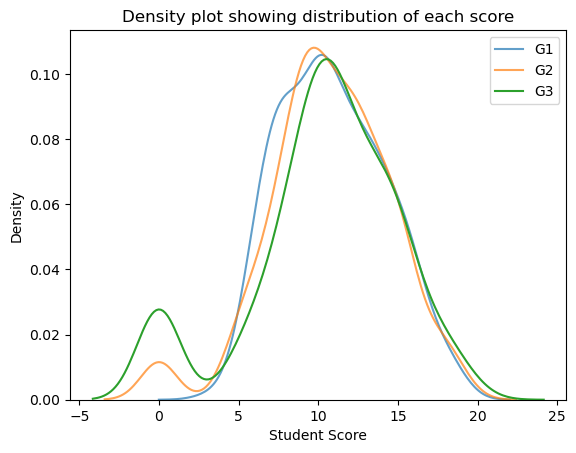

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Density plot of all student grades to observe distribution
plt.figure()
sns.kdeplot(df_math, x = 'G1', alpha = 0.7, label = 'G1')
sns.kdeplot(df_math, x = 'G2', alpha = 0.7, label = 'G2')
sns.kdeplot(df_math, x = 'G3', label = 'G3')
plt.xlabel("Student Score")
plt.title("Density plot showing distribution of each score")
plt.legend()

Mean of G1 for GP and MS = 10.94 and 10.67 respectivily
Mean of G2 for GP and MS = 10.78 and 10.2 respectivily
Mean of G3 for GP and MS = 10.49 and 9.85 respectivily


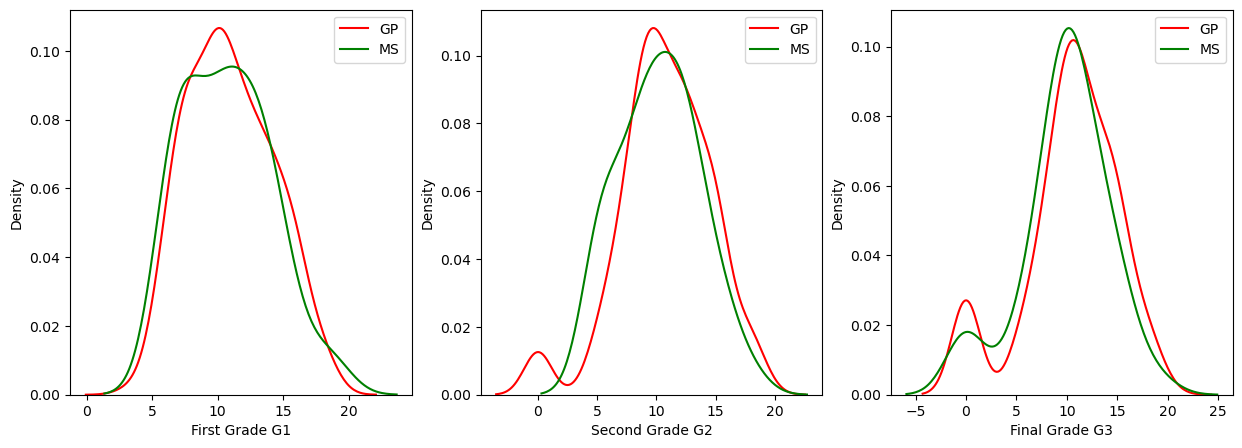

In [6]:
gp_grade_mean = np.round(df_gp[['G1','G2','G3']].mean(), 2)
ms_grade_mean = np.round(df_ms[['G1','G2','G3']].mean(),2)

gp_grade_std = df_gp[['G1','G2','G3']].std()
ms_grade_std = df_ms[['G1','G2','G3']].std()

print("Mean of G1 for GP and MS = {} and {} respectivily".format(gp_grade_mean.iloc[0], ms_grade_mean.iloc[0]))
print("Mean of G2 for GP and MS = {} and {} respectivily".format(gp_grade_mean.iloc[1], ms_grade_mean.iloc[1]))
print("Mean of G3 for GP and MS = {} and {} respectivily".format(gp_grade_mean.iloc[2], ms_grade_mean.iloc[2]))
#Creation of 3 subplots running horizontally
fig, ax = plt.subplots(1,3, figsize = (15,5))
#Three density plots comparing student scores between schools for each grade
sns.kdeplot(df_gp, ax = ax[0], x = 'G1', label = "GP", color = 'r')
sns.kdeplot(df_ms, ax = ax[0], x = 'G1', label = "MS", color = 'g')
ax[0].set_xlabel("First Grade G1")
ax[0].legend()

sns.kdeplot(df_gp, ax = ax[1], x = 'G2', label = "GP", color = 'r')
sns.kdeplot(df_ms, ax = ax[1], x = 'G2', label = "MS", color = 'g')
ax[1].set_xlabel("Second Grade G2")
ax[1].legend()

sns.kdeplot(df_gp, ax = ax[2], x = 'G3', label = "GP", color = 'r')
sns.kdeplot(df_ms, ax = ax[2], x = 'G3', label = "MS", color = 'g')
ax[2].set_xlabel("Final Grade G3")
ax[2].legend()

Text(0.5, 1.0, 'Final Grade by school')

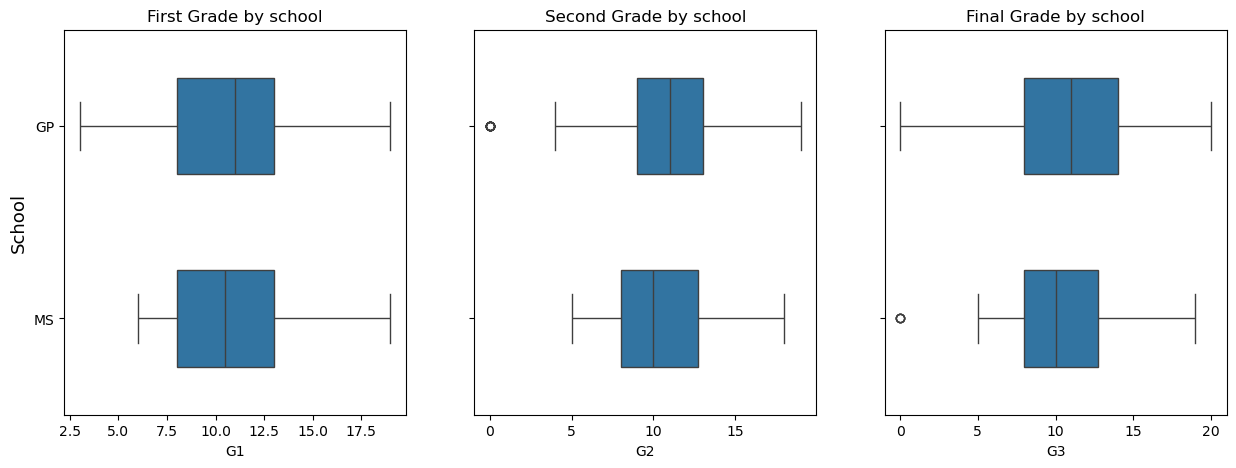

In [7]:
#Create figure with 3 subplots running horizontally
fig, ax = plt.subplots(1,3, figsize = (15,5), sharey = True)
#Three boxplots displaying distribution of grades grouped by school
sns.boxplot(df_math_ohe, ax = ax[0], x = 'G1', y = 'school', width = 0.5)
ax[0].set_xlabel("G1")
ax[0].set_ylabel("School", size = 13)
ax[0].set_title("First Grade by school")

sns.boxplot(df_math_ohe, ax = ax[1], x = 'G2', y = 'school',  width = 0.5)
ax[1].set_xlabel("G2")
ax[1].set_title("Second Grade by school")

sns.boxplot(df_math_ohe, ax = ax[2], x = 'G3', y = 'school',  width = 0.5)
ax[2].set_xlabel("G3")
ax[2].set_title("Final Grade by school")

Text(0.5, 1.0, 'Study time per week (hrs)')

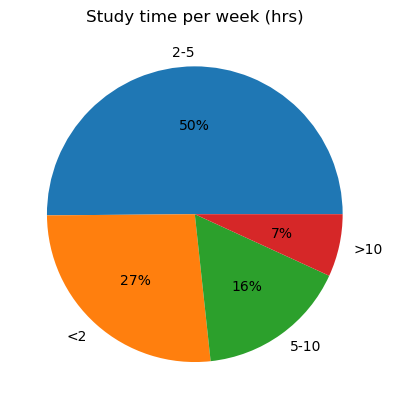

In [8]:
study_counts = df_math['studytime'].value_counts()
study_label = ['2-5','<2','5-10','>10']

plt.pie(study_counts, labels = study_label, autopct='%.0f%%')
plt.title("Study time per week (hrs)")

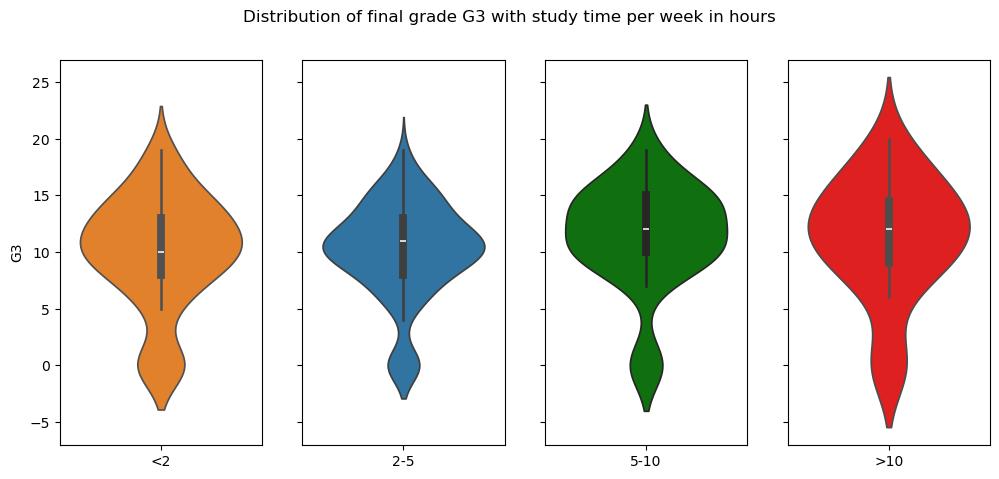

In [9]:
df_study = df_math[['studytime','G3']].sort_values(['studytime'], ascending = True)
df_study1 = df_study[df_study['studytime'] == 1]
df_study2 = df_study[df_study['studytime'] == 2]
df_study3 = df_study[df_study['studytime'] == 3]
df_study4 = df_study[df_study['studytime'] == 4]

#4 violin plots showing the distribution of G3 for different study times 
fig, ax = plt.subplots(1,4, figsize = (12,5), sharey = True)
fig.suptitle("Distribution of final grade G3 with study time per week in hours")
sns.violinplot(data = df_study1, ax = ax[0], x = 'studytime', y = 'G3', color = 'tab:orange')
ax[0].set_xlabel("<2")
ax[0].tick_params(labelbottom = False)
sns.violinplot(data = df_study2, ax = ax[1], x = 'studytime', y = 'G3')
ax[1].set_xlabel("2-5")
ax[1].tick_params(labelbottom = False)
sns.violinplot(data = df_study3, ax = ax[2], x = 'studytime', y = 'G3', color = 'g')
ax[2].set_xlabel("5-10")
ax[2].tick_params(labelbottom = False)
sns.violinplot(data = df_study4, ax = ax[3], x = 'studytime', y = 'G3', color = 'r')
ax[3].set_xlabel(">10")
ax[3].tick_params(labelbottom = False)



Text(21.25, 0.05, '4 = >10')

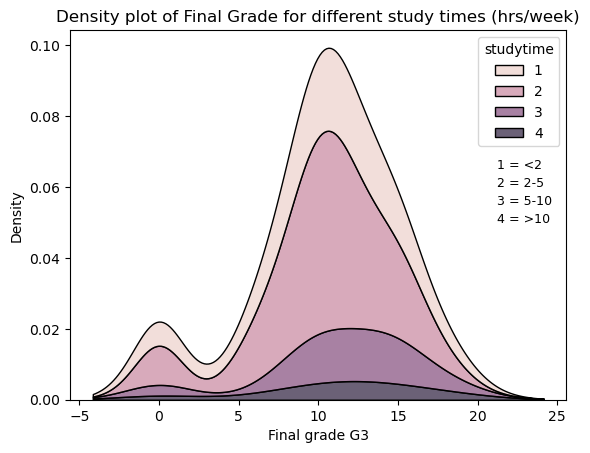

In [10]:
sns.kdeplot(df_study, x= "G3", hue = "studytime", multiple = "stack", alpha = 0.7)
plt.xlabel("Final grade G3")
plt.title("Density plot of Final Grade for different study times (hrs/week)")
plt.text(21.25, 0.065, "1 = <2", fontsize = 9)
plt.text(21.25, 0.06, "2 = 2-5", fontsize = 9)
plt.text(21.25, 0.055, "3 = 5-10", fontsize = 9)
plt.text(21.25, 0.05, "4 = >10", fontsize = 9)

In [11]:
study1_mean = np.round(df_study1["G3"].mean(),2)
study2_mean = np.round(df_study2["G3"].mean(),2)
study3_mean = np.round(df_study3["G3"].mean(),2)
study4_mean = np.round(df_study4["G3"].mean(),2)

print("The mean final score for each study time group (<2, 2-5, 5-10, >10) is {}, {}, {}, {}, respectively".format(study1_mean,study2_mean,study3_mean,study4_mean))

The mean final score for each study time group (<2, 2-5, 5-10, >10) is 10.05, 10.17, 11.4, 11.26, respectively


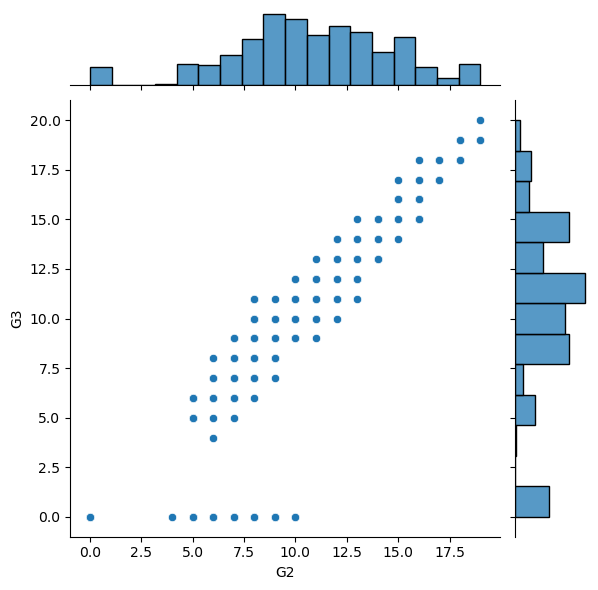

In [12]:
sns.jointplot(df_math, x = "G2", y = "G3")

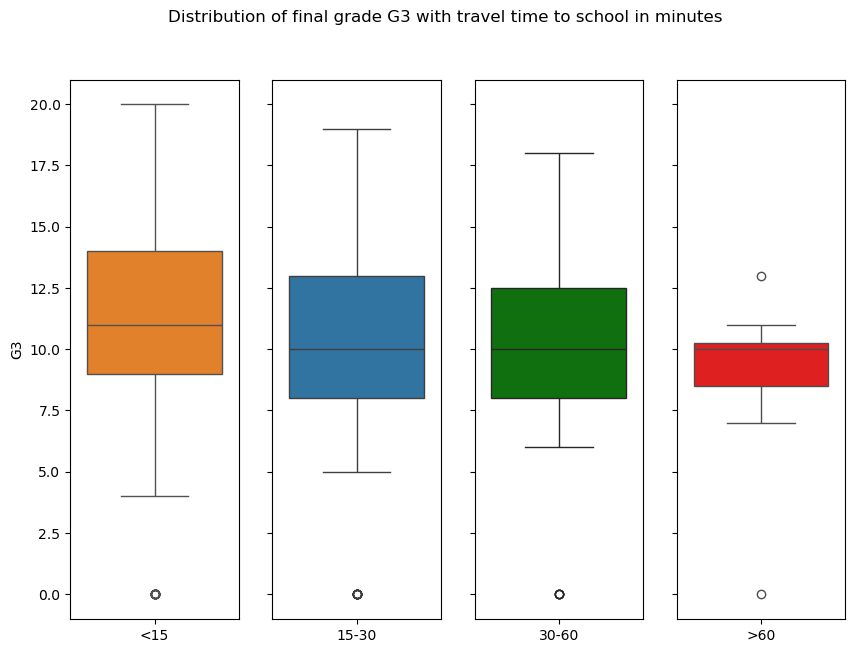

In [13]:
df_travel = df_math[['traveltime','G3']].sort_values(['traveltime'], ascending = True)
df_travel1 = df_travel[df_travel['traveltime'] == 1]
df_travel2 = df_travel[df_travel['traveltime'] == 2]
df_travel3 = df_travel[df_travel['traveltime'] == 3]
df_travel4 = df_travel[df_travel['traveltime'] == 4]

fig, ax = plt.subplots(1,4, figsize = (10,7), sharey = True)
fig.suptitle("Distribution of final grade G3 with travel time to school in minutes")
sns.boxplot(data = df_travel1, ax = ax[0], x = 'traveltime', y = 'G3', color = 'tab:orange')
ax[0].set_xlabel("<15")
ax[0].tick_params(labelbottom = False)
sns.boxplot(data = df_travel2, ax = ax[1], x = 'traveltime', y = 'G3')
ax[1].set_xlabel("15-30")
ax[1].tick_params(labelbottom = False)
sns.boxplot(data = df_travel3, ax = ax[2], x = 'traveltime', y = 'G3', color = 'g')
ax[2].set_xlabel("30-60")
ax[2].tick_params(labelbottom = False)
sns.boxplot(data = df_travel4, ax = ax[3], x = 'traveltime', y = 'G3', color = 'r')
ax[3].set_xlabel(">60")
ax[3].tick_params(labelbottom = False)

Text(21.25, 0.05, '4 = >60')

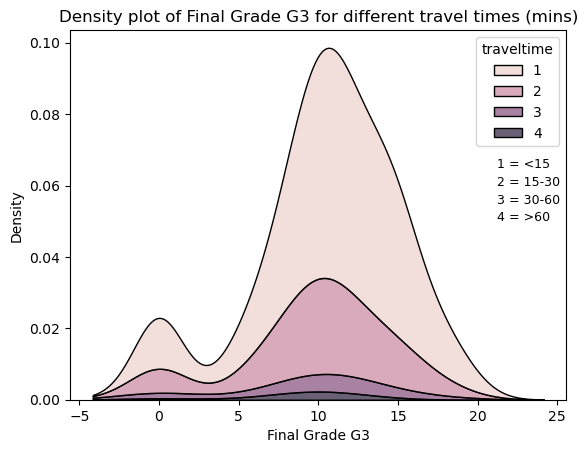

In [14]:
sns.kdeplot(df_travel, x= "G3", hue = "traveltime", multiple = "stack", alpha = 0.7)
plt.xlabel("Final Grade G3")
plt.title("Density plot of Final Grade G3 for different travel times (mins)")
plt.text(21.25, 0.065, "1 = <15", fontsize = 9)
plt.text(21.25, 0.06, "2 = 15-30", fontsize = 9)
plt.text(21.25, 0.055, "3 = 30-60", fontsize = 9)
plt.text(21.25, 0.05, "4 = >60", fontsize = 9)

In [15]:
travel1_mean = np.round(df_travel1["G3"].mean(),2)
travel2_mean = np.round(df_travel2["G3"].mean(),2)
travel3_mean = np.round(df_travel3["G3"].mean(),2)
travel4_mean = np.round(df_travel4["G3"].mean(),2)

print("The mean final score for each study time group (<15, 15-30, 30-60, >60) is {}, {}, {}, {}, respectively".format(travel1_mean,travel2_mean,travel3_mean,travel4_mean))

The mean final score for each study time group (<15, 15-30, 30-60, >60) is 10.78, 9.91, 9.26, 8.75, respectively


# Hypothesis testing and categorical comparisons

In [16]:
import scipy.stats as st
from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats

There is sufficient evidence to reject the null hypothesis that there is no significant difference between the groups in terms of final score
p-value = 0.013432661789789132


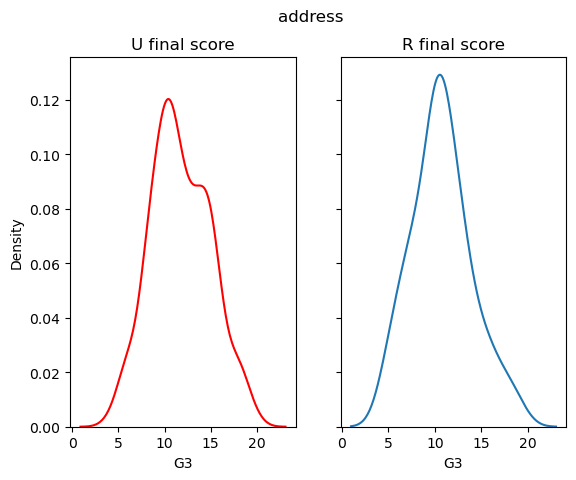

In [17]:
#Remove outliers (where final grade is zero) to ensure normality
df_math_nonzero = df_math.drop(df_math[df_math["G3"] == 0].index)
#Specify which feature to be tested and the two groups it is divided into
feature_name = "address"
group1_name = "U"
group2_name = "R"

group_1 = df_math_nonzero[df_math_nonzero[feature_name] == group1_name]
group_2 = df_math_nonzero[df_math_nonzero[feature_name] == group2_name]

fig, ax = plt.subplots(1,2, sharey = True)
sns.kdeplot(group_1, ax = ax[0], x = "G3", color = 'r')
sns.kdeplot(group_2, ax = ax[1], x = "G3")
fig.suptitle(feature_name)
ax[0].set_title("{} final score".format(group1_name))
ax[1].set_title("{} final score".format(group2_name))

alpha = 0.05

z = ztest(group_1["G3"], group_2["G3"],value = 0)
#Test whether to reject the null hypothesis or not depending on the p-value
if z[1] <= alpha:
    print("There is sufficient evidence to reject the null hypothesis that there is no significant difference between the groups in terms of final score\np-value = {}".format(z[1]))
else:
    print("There is not sufficient evidence to reject the null hypothesis that there is no significant difference between the groups in terms of the final score\np-value = {}".format(z[1]))


In [18]:
from scipy.stats import chi2_contingency
#Define function for performing chi 2 analysis
def chi_2(cat_1, cat_2, df_math):

    #Selected category data taken from dataframe
    df_cat_1 = df_math[cat_1]
    df_cat_2 = df_math[cat_2]
    #Cross tabulation table created from the 2 categories
    contingency_table = pd.crosstab(df_cat_1, df_cat_2)

    #Relevant values retrieved using chi2 contingency function
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    #Significance level defined
    alpha = 0.05

    # Interpret the results
    if p < alpha:
        result = print("There is a significant association between {} and {} preferences.\nChi 2 value is {}\np-value is {}\nDegrees of freedom {}\nExpected value {}".format(cat_1,cat_2, chi2, p, dof, expected))
    else:
        result = print("There is no significant association between {} and {} preferences.\nChi 2 value is {}\np-value is {}\nDegrees of freedom {}\nExpected value {}".format(cat_1,cat_2, chi2, p, dof, expected))

    return result, contingency_table

In [19]:
cat_1 = str(input("Please choose the first category:"))
cat_2 = str(input("Please choose the second category:"))

chi_2_result, con_table = chi_2(cat_1, cat_2, df_math)
print(con_table)

Please choose the first category: Medu
Please choose the second category: Fedu


There is a significant association between Medu and Fedu preferences.
Chi 2 value is 199.97731385712396
p-value is 8.014562451932377e-34
Degrees of freedom 16
Expected value [[1.51898734e-02 6.22784810e-01 8.73417722e-01 7.59493671e-01
  7.29113924e-01]
 [2.98734177e-01 1.22481013e+01 1.71772152e+01 1.49367089e+01
  1.43392405e+01]
 [5.21518987e-01 2.13822785e+01 2.99873418e+01 2.60759494e+01
  2.50329114e+01]
 [5.01265823e-01 2.05518987e+01 2.88227848e+01 2.50632911e+01
  2.40607595e+01]
 [6.63291139e-01 2.71949367e+01 3.81392405e+01 3.31645570e+01
  3.18379747e+01]]
Fedu  0   1   2   3   4
Medu                   
0     0   1   2   0   0
1     1  37  15   5   1
2     0  28  51  17   7
3     0  15  28  38  18
4     1   1  19  40  70


# Singular Value Decomposition

In [20]:
from sklearn.preprocessing import StandardScaler

def singular_decomp(X, n_components):
    scaler = StandardScaler()
    #X data standardised
    X_stan = scaler.fit_transform(X)
    #SVD performed on x data
    U, S, Vt = np.linalg.svd(X_stan)

    X_reduced = np.dot(X_stan, Vt.T[:,:n_components])

    explained_varience_ratio = (S**2)/(np.sum(S**2))
    
    return X_reduced, Vt, explained_varience_ratio

In [21]:
#Drop the target variable 'G3' from the dataframe and assign the rest to the variable X
X = df_math_pre.drop(['G3'], axis = 1).values
#Assign column G3 to variable Y
Y = df_math_pre['G3'].values

#The number of Principal Components wanted
num_components = 10
X_reduced, Vt, explained_varience_ratio= singular_decomp(X, num_components)

<BarContainer object of 45 artists>

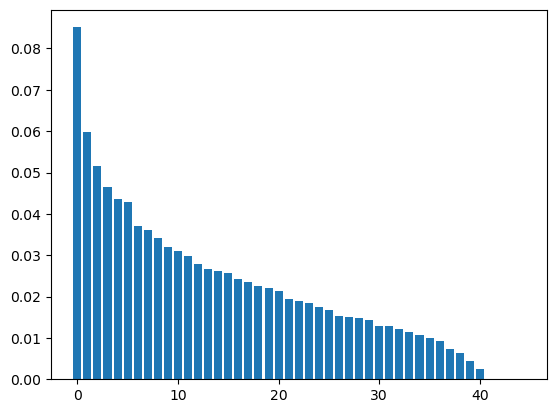

In [22]:
#Plot of the explained variance ratio for each Principal Component
plt.bar(range(len(explained_varience_ratio)), explained_varience_ratio)

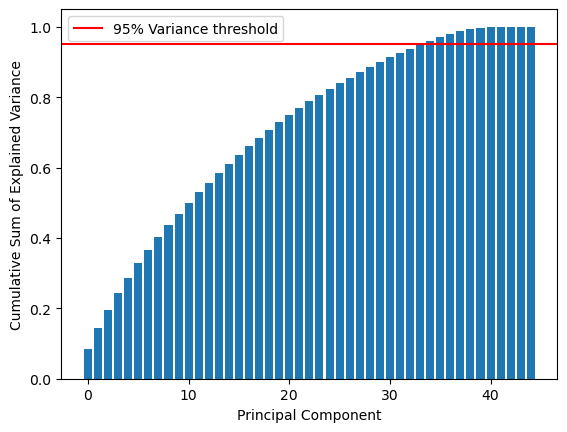

In [23]:
#Cumulative sum of the explained variance ratios
cum_evr = np.cumsum(explained_varience_ratio)

#Plot of the cumulative sum for each principal component
plt.bar(range(len(explained_varience_ratio)), cum_evr)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Sum of Explained Variance")
plt.axhline(y = 0.95, color = 'r', label = "95% Variance threshold")
plt.legend()

# Gradient Descent

In [24]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Standardize the feature data
scaler = StandardScaler()
X_stan = scaler.fit_transform(X)

#Add a column of ones to the start X to account for the intercept term
m = len(Y)
X_final = np.hstack((np.ones((m,1)), X_stan))

#Split both feature and target variables into training and test data
x_train, x_test, y_train, y_test = train_test_split(X_final, Y, test_size = 0.2)

In [25]:
#Define gradient descent function
def gradient_descent(X, Y, weight, iterations, learning_rate):

    m = len(Y)
    #Array to record change of the cost function with each iteration
    cost_history = []

    for i in range(iterations):

        #Gradient of cost function calculated from predicted value of y and difference between this and actual value
        prediction = X.dot(weight)
        error = prediction - Y
        gradient = (2/m) * (X.T.dot(error))
        #The weight values are modified
        weight -= learning_rate*gradient
        cost = (1/2*m) * np.sum(error**2)
        cost_history.append(cost)

        #Every 100th iteration, the ith value and cost are printed. (Been commented out to use hyperparameter optimisation model)
        #if i%100 == 0:
        #    print("Cost at {}th iteration is {}".format(i, np.round(cost, 2)))
        
    return weight, cost_history

In [26]:
#Define weight term, learning rate and number of iterations
theta = np.zeros(x_train.shape[1])
theta
learning_rate = 0.01
iterations = 1000


theta, cost_history = gradient_descent(x_train, y_train, theta, iterations, learning_rate)

Cost at 0th iteration is 6495222.0
Cost at 100th iteration is 273828.54
Cost at 200th iteration is 165891.54
Cost at 300th iteration is 160335.85
Cost at 400th iteration is 158570.35
Cost at 500th iteration is 157543.79
Cost at 600th iteration is 156891.8
Cost at 700th iteration is 156470.57
Cost at 800th iteration is 156197.23
Cost at 900th iteration is 156019.58


Text(0, 0.5, 'Cost function value')

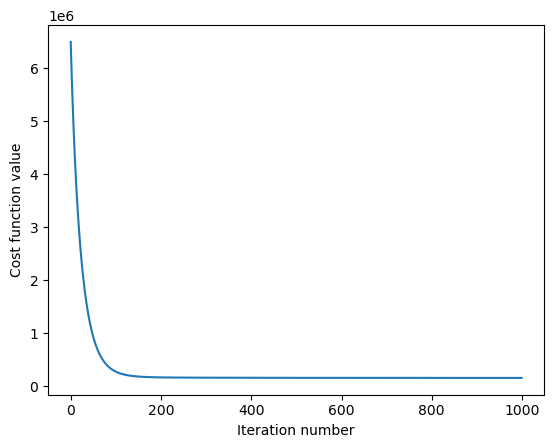

In [27]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration number")
plt.ylabel("Cost function value")

In [28]:
#Define a function used for optimising the learning rate and iteration number
def gradient_descent_op(x_train, y_train, y_test, learning_rate_arr, iterations_arr):

    theta = np.zeros(x_train.shape[1])
    #Define array to store the mean square error values for different hyperparameter combinations
    MSE_arr = np.zeros(shape = (len(learning_rate_arr), len(iterations_arr)))

    #Iterate through each hyperparameter combination
    for i in range(len(learning_rate_arr)):
        for j in range(len(iterations_arr)):

            #Hyperparameter values assigned to variables
            learn_rate = learning_rate_arr[i]
            iteration = iterations_arr[j]

            #Gradient descent performed using feature and target training data
            theta_r, cost_history_r = gradient_descent(x_train, y_train, theta, iteration, learn_rate)

            #Calculation of mean squared error 
            predict_y = x_test.dot(theta_r)
            MSE = np.mean((predict_y - y_test)**2)

            #Mean squared error value stored in the array
            MSE_arr[i,j] = MSE

    #Index values calculated for where MSE is at a minimum
    op_index = np.unravel_index(MSE_arr.argmin(), MSE_arr.shape)

    #Index values used to find optimal hyperparameter values
    learning_rate_op = learning_rate_arr[op_index[0]]
    iterations_op = iterations_arr[op_index[1]]

    return learning_rate_op, iterations_op, np.min(MSE_arr)

In [29]:
#Define minimum and maximum learning rate for optimisation and create array of values
min_learning_rate = 0.001
max_learning_rate = 0.02
learning_step = 0.0005
learning_rate_arr = np.arange(min_learning_rate, max_learning_rate+learning_step, learning_step)

#Define minimum and maximum iteration number for optimisation and create array of values
min_it = 1200
max_it = 1400
it_step = 50
iterations_arr = np.arange(min_it, max_it + it_step, it_step) 
#Find the optimum learning rate and number of iterations 
learning_op, iterations_op, min_MSE = gradient_descent_op(x_train, y_train, y_test, learning_rate_arr, iterations_arr)

print("The optimal learning rate and number of iterations are {} and {}, respectively, with a mean squared error of {}".format(learning_op, iterations_op, min_MSE))

Cost at 0th iteration is 6495222.0
Cost at 100th iteration is 4185663.34
Cost at 200th iteration is 2789696.65
Cost at 300th iteration is 1901300.97
Cost at 400th iteration is 1322694.97
Cost at 500th iteration is 941333.76
Cost at 600th iteration is 688104.09
Cost at 700th iteration is 519027.32
Cost at 800th iteration is 405609.44
Cost at 900th iteration is 329194.31
Cost at 1000th iteration is 277481.85
Cost at 1100th iteration is 242321.04
Cost at 0th iteration is 218288.51
Cost at 100th iteration is 201763.38
Cost at 200th iteration is 190320.75
Cost at 300th iteration is 182331.94
Cost at 400th iteration is 176699.9
Cost at 500th iteration is 172683.52
Cost at 600th iteration is 169780.55
Cost at 700th iteration is 167649.49
Cost at 800th iteration is 166057.29
Cost at 900th iteration is 164844.25
Cost at 1000th iteration is 163900.45
Cost at 1100th iteration is 163149.83
Cost at 1200th iteration is 162539.49
Cost at 0th iteration is 162274.87
Cost at 100th iteration is 161809.02